In [83]:
import numpy as np
import matplotlib.pyplot as pltb

In [84]:

# Load the dataset
independent_variable = np.array([9.1, 8, 9.1, 8.4, 6.9, 7.7, 15.6, 7.3, 7, 7.2, 10.1, 11.5, 7.1, 10, 8.9, 7.9, 5.6, 6.3, 6.7, 10.4, 8.5, 7.4, 6.3, 5.4, 8.9, 9.4, 7.5, 11.9, 7.8, 7.4, 10.8, 10.2, 6.2, 7.7, 13.7, 8, 6.7, 6.7, 7, 8.3, 7.4, 9.9, 6.1, 7, 5.4, 10.7, 7.6, 8.9, 9.2, 6.6, 7.2, 8, 7.8, 7.9, 7, 7, 7.6, 9.1, 9, 7.9, 6.6, 11.9, 6.5, 7.1, 8.8, 7.5, 7.7, 6, 10.6, 6.6, 8.2, 7.9, 7.1, 5.6, 6.4, 7.5, 9.8, 7, 10.5, 7.1, 6.2, 6.5, 7.7, 7.2, 9.3, 8.5, 7.7, 6.8, 7.8, 8.7, 9.6, 7.2, 9.3, 8.1, 6.6, 7.8, 10.2, 6.1, 7.3, 7.3])
dependent_variable = np.array([0.99523, 0.99007, 0.99769, 0.99386, 0.99508, 0.9963, 1.0032, 0.99768, 0.99584, 0.99609, 0.99774, 1.0003, 0.99694, 0.99965, 0.99549, 0.99364, 0.99378, 0.99379, 0.99524, 0.9988, 0.99733, 0.9966, 0.9955, 0.99471, 0.99354, 0.99786, 0.9965, 0.9988, 0.9964, 0.99713, 0.9985, 0.99565, 0.99578, 0.9976, 1.0014, 0.99685, 0.99648, 0.99472, 0.99914, 0.99408, 0.9974, 1.0002, 0.99402, 0.9966, 0.99402, 1.0029, 0.99718, 0.9986, 0.9952, 0.9952, 0.9972, 0.9976, 0.9968, 0.9978, 0.9951, 0.99629, 0.99656, 0.999, 0.99836, 0.99396, 0.99387, 1.0004, 0.9972, 0.9972, 0.99546, 0.9978, 0.99596, 0.99572, 0.9992, 0.99544, 0.99747, 0.99668, 0.9962, 0.99346, 0.99514, 0.99476, 1.001, 0.9961, 0.99598, 0.99608, 0.9966, 0.99732, 0.9962, 0.99546, 0.99738, 0.99456, 0.9966, 0.99553, 0.9984, 0.9952, 0.997, 0.99586, 0.9984, 0.99542, 0.99655, 0.9962, 0.9976, 0.99464, 0.9983, 0.9967])


In [85]:

# Normalize the data
independent_variable = (independent_variable - np.mean(independent_variable)) / np.std(independent_variable)

# Add a column of ones for the bias term
X = np.c_[np.ones(len(independent_variable)), independent_variable]

# Initialize parameters
theta = np.zeros(2)

In [86]:

# Hyperparameters
learning_rate_batch = 0.5
learning_rate_stochastic = 0.05
learning_rate_mini_batch = 0.1
learning_rate = 0.1
iterations = 1000
convergence_threshold = 1e-5
batch_size = 10  # Adjust batch size for mini-batch gradient descent

# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = X.dot(theta)
    J = (1/(2*m)) * np.sum((h-y)**2)
    return J

In [87]:
# Gradient Descent
def gradient_descent(X, y, theta, learning_rate, iterations, convergence_threshold):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        h = X.dot(theta)
        gradient = (1/m) * X.T.dot(h-y)
        theta = theta - learning_rate * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        # Convergence check
        if len(cost_history) > 1 and abs(cost_history[-2] - cost_history[-1]) < convergence_threshold:
            break

    return theta, cost_history

In [88]:

# Batch Gradient Descent
def batch_gradient_descent(X, y, theta, learning_rate, iterations, convergence_threshold):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        h = X.dot(theta)
        gradient = (1/m) * X.T.dot(h-y)
        theta = theta - learning_rate * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        # Convergence check
        if len(cost_history) > 1 and abs(cost_history[-2] - cost_history[-1]) < convergence_threshold:
            break

    return theta, cost_history

In [89]:
# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, theta, learning_rate, iterations, convergence_threshold):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        for i in range(m):
            h = X[i].dot(theta)
            gradient = X[i].T * (h-y[i])
            theta = theta - learning_rate * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        # Convergence check
        if len(cost_history) > 1 and abs(cost_history[-2] - cost_history[-1]) < convergence_threshold:
            break

    return theta, cost_history

In [90]:
# Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X, y, theta, learning_rate, iterations, convergence_threshold, batch_size):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        for i in range(0, m, batch_size):
            X_batch = X[i:i+batch_size]
            y_batch = y[i:i+batch_size]
            h = X_batch.dot(theta)
            gradient = (1/batch_size) * X_batch.T.dot(h-y_batch)
            theta = theta - learning_rate * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        # Convergence check
        if len(cost_history) > 1 and abs(cost_history[-2] - cost_history[-1]) < convergence_threshold:
            break

    return theta, cost_history

In [91]:

# Batch Gradient Descent
theta_batch, cost_history_batch = batch_gradient_descent(X, dependent_variable, np.zeros(2), learning_rate_batch, iterations, convergence_threshold)

# Stochastic Gradient Descent
theta_stochastic, cost_history_stochastic = stochastic_gradient_descent(X, dependent_variable, np.zeros(2), learning_rate_stochastic, iterations, convergence_threshold)

# Mini-Batch Gradient Descent
theta_mini_batch, cost_history_mini_batch = mini_batch_gradient_descent(X, dependent_variable, np.zeros(2), learning_rate_mini_batch, iterations, convergence_threshold, batch_size)


In [92]:
# Perform Gradient Descent
theta, cost_history = gradient_descent(X, dependent_variable, theta, learning_rate, iterations, convergence_threshold)

# 1. Cost function value and learning parameters values after convergence
print(f"1. Cost function value after convergence: {cost_history[-1]}")
print(f"   Learning Parameters values after convergence: {theta}")
print(f"   Convergence criteria: Change in cost less than {convergence_threshold}")


1. Cost function value after convergence: 3.902649554179031e-05
   Learning Parameters values after convergence: [0.98792164 0.0013285 ]
   Convergence criteria: Change in cost less than 1e-05


In [93]:

# 2. Advantage of averaging the cost
# Averaging the cost helps in normalizing the cost function and makes it independent of the number of training examples. It helps in comparing models trained on different datasets or different sizes.


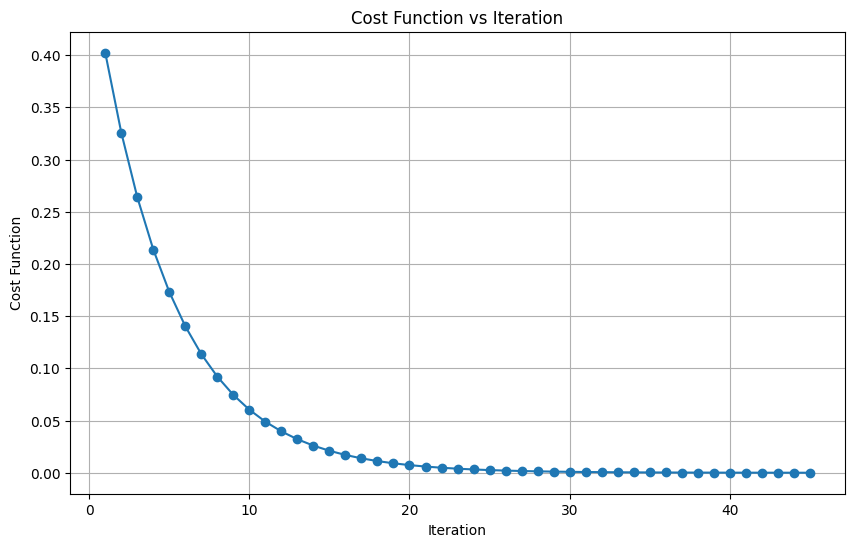

In [94]:

# 3. Plot cost function v/s iteration graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cost_history) + 1), cost_history, marker='o')
plt.title('Cost Function vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Cost Function')
plt.grid(True)
plt.show()

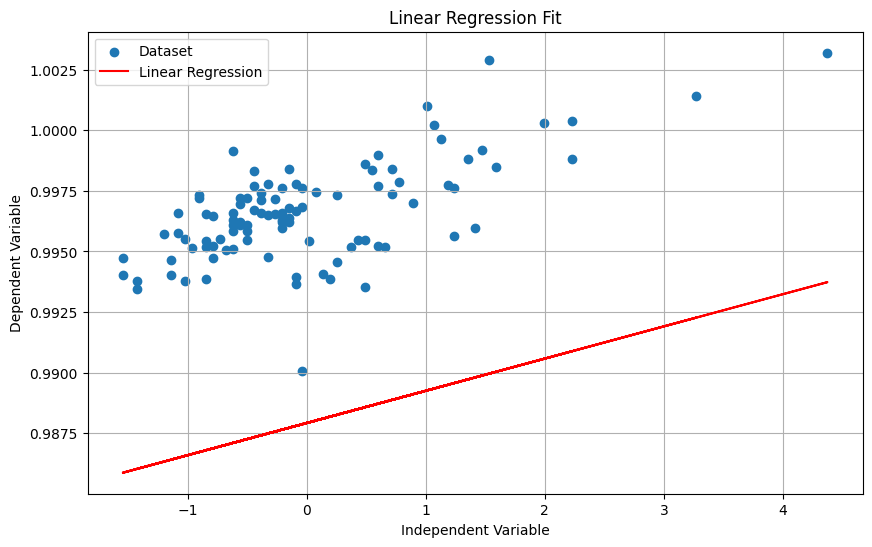

In [95]:
# 4. Plot the dataset and the obtained line
plt.figure(figsize=(10, 6))
plt.scatter(independent_variable, dependent_variable, label='Dataset')
plt.plot(independent_variable, X.dot(theta), color='red', label='Linear Regression')
plt.title('Linear Regression Fit')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\KIIT\AppData\Local\Temp\ipykernel_19088\3041019940.py:14: RuntimeWarning: overflow encountered in square
  J = (1/(2*m)) * np.sum((h-y)**2)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_19088\2075993712.py:14: RuntimeWarning: invalid value encountered in scalar subtract
  if len(cost_history) > 1 and abs(cost_history[-2] - cost_history[-1]) < convergence_threshold:
C:\Users\KIIT\AppData\Local\Temp\ipykernel_19088\2075993712.py:9: RuntimeWarning: invalid value encountered in subtract
  theta = theta - learning_rate * gradient


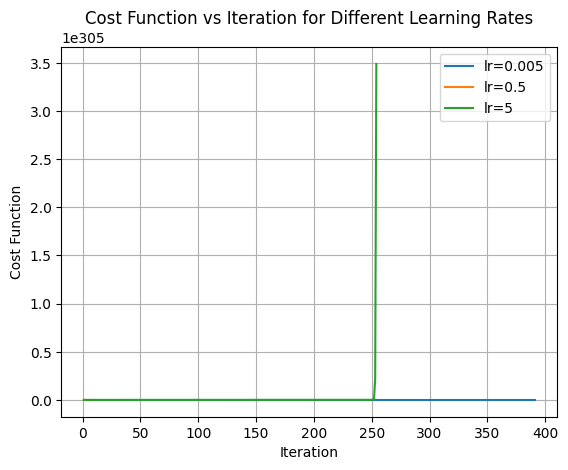

In [96]:
# 5. Test regression model with different learning rates
learning_rates = [0.005, 0.5, 5]
theta = np.zeros(2)
convergence_threshold = 1e-4

for lr in learning_rates:
    _, cost_history = gradient_descent(X, dependent_variable, np.zeros(2), lr, iterations, convergence_threshold)
    plt.plot(range(1, len(cost_history) + 1), cost_history, label=f'lr={lr}')

plt.title('Cost Function vs Iteration for Different Learning Rates')
plt.xlabel('Iteration')
plt.ylabel('Cost Function')
plt.legend()
plt.grid(True)
plt.show()

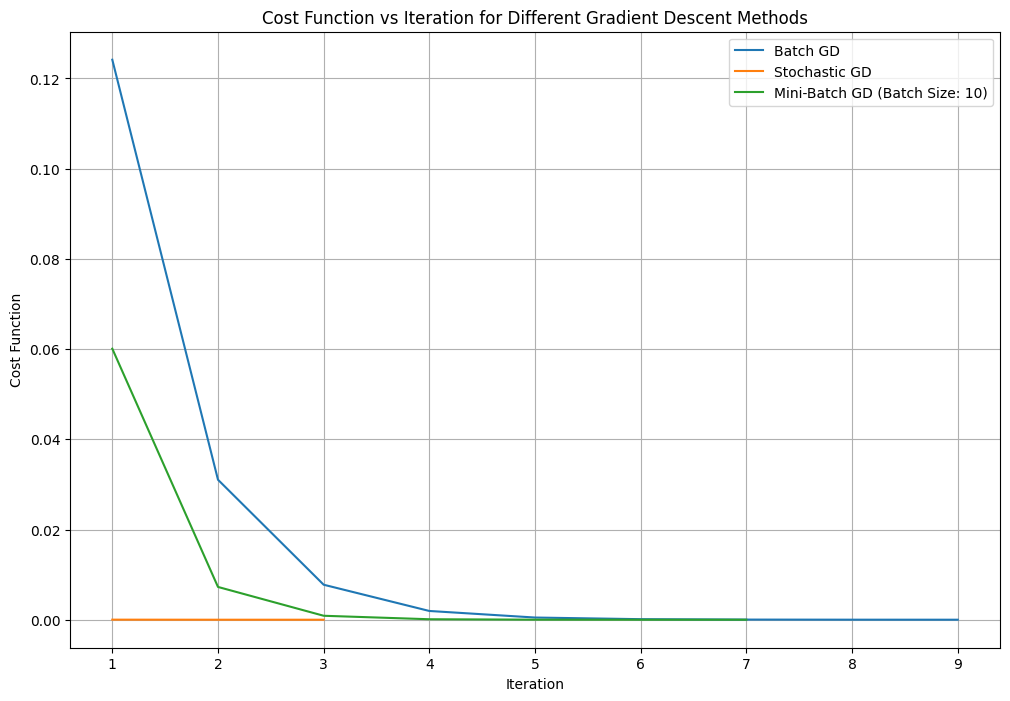

In [97]:

# Plot the cost function against iteration for each method
plt.figure(figsize=(12, 8))
plt.plot(range(1, len(cost_history_batch) + 1), cost_history_batch, label='Batch GD')
plt.plot(range(1, len(cost_history_stochastic) + 1), cost_history_stochastic, label='Stochastic GD')
plt.plot(range(1, len(cost_history_mini_batch) + 1), cost_history_mini_batch, label=f'Mini-Batch GD (Batch Size: {batch_size})')
plt.title('Cost Function vs Iteration for Different Gradient Descent Methods')
plt.xlabel('Iteration')
plt.ylabel('Cost Function')
plt.legend()
plt.grid(True)
plt.show()